In [19]:
#Import all needed packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import collections
from collections import Counter

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
#Setring the wd
os.chdir("/Users/danielalejandroramos/Desktop/BDBA Masters/Machine Learning with Python/Assignments")
#Import data
data=pd.read_csv('train.csv')

In [21]:
#Exploring Data
print(data.head())
data.describe()

   label   id  visitTime  purchaseTime  hour          C1          C2  \
0     -1   37   19274330            -1     0  2569487005  1830830742   
1     -1   55   19274334            -1     0  3191875643   403381353   
2     -1  114   19274353            -1     0  2634604934   403381353   
3     -1  128   19274358            -1     0  2569487005   403381353   
4     -1  164   19274367            -1     0  2569487005   403381353   

           C3         C4          C5  ...  N4  N5  N6  N7  N8  N9  N10  \
0  4228834423  652481754  2967512603  ...   0   0   0   0   0   0    0   
1  1238330876  652481754  2967512603  ...   0   0   0   0   1   0    0   
2  1928325921  652481754  2967512603  ...   0   0   0   0   0   0    0   
3   296915027  652481754  2967512603  ...   0   0   0   0   0   0    0   
4   681762206  652481754  2967512603  ...   0   0   0   0   0   0    0   

          C10         C11         C12  
0   419316267  3617851689  4220791646  
1  1968545380  3831440054  1213938795  
2 

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
count,31428.000000,31428.000000,3.142800e+04,3.142800e+04,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,...,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04
mean,-0.996373,321870.448835,1.931855e+07,3.504330e+04,11.799701,2.264373e+09,1.331820e+09,2.255368e+09,1.018468e+09,2.741699e+09,...,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319,0.057560,2.218926e+09,2.939366e+09,2.158890e+09
std,0.085098,184665.780120,1.690395e+04,8.221503e+05,4.695434,1.077516e+09,7.900907e+08,1.125852e+09,7.260969e+08,3.771211e+08,...,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314,1.158253,1.235285e+09,1.020598e+09,1.416777e+09
min,-1.000000,37.000000,1.927433e+07,-1.000000e+00,0.000000,7.942600e+04,4.033814e+08,5.538985e+06,3.063949e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626600e+04,4.393702e+07,2.456084e+08
25%,-1.000000,162636.500000,1.930609e+07,-1.000000e+00,8.000000,1.464958e+09,4.033814e+08,1.408383e+09,6.524818e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140301e+09,2.379634e+09,1.213939e+09
50%,-1.000000,322691.500000,1.931761e+07,-1.000000e+00,12.000000,2.569487e+09,1.235983e+09,2.243934e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.274128e+09,3.617852e+09,1.284343e+09
75%,-1.000000,481852.000000,1.933113e+07,-1.000000e+00,15.000000,2.834768e+09,2.018710e+09,3.326547e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.376114e+09,3.831440e+09,4.220792e+09
max,1.000000,638505.000000,1.936054e+07,1.935732e+07,23.000000,4.294924e+09,2.541204e+09,4.292704e+09,2.308171e+09,3.955179e+09,...,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000,86.000000,4.294964e+09,3.831440e+09,4.220792e+09


In [22]:
#Checking Data
for col in data.columns:
    print ("------{}------".format(col))
    print (data[col].value_counts())

------label------
-1    31371
 1       57
Name: label, dtype: int64
------id------
399357    1
159399    1
525994    1
278189    1
448176    1
         ..
68628     1
590869    1
476883    1
5143      1
327680    1
Name: id, Length: 31428, dtype: int64
------visitTime------
19328699    6
19319226    6
19325796    5
19314062    5
19310993    5
           ..
19310525    1
19283902    1
19314623    1
19318721    1
19300352    1
Name: visitTime, Length: 24587, dtype: int64
------purchaseTime------
-1           31371
 19307708        1
 19319002        1
 19306613        1
 19298361        1
 19330955        1
 19318637        1
 19324431        1
 19295049        1
 19331883        1
 19325720        1
 19344902        1
 19331996        1
 19325359        1
 19323160        1
 19327407        1
 19327835        1
 19323177        1
 19300350        1
 19344084        1
 19345863        1
 19312951        1
 19304723        1
 19335360        1
 19337379        1
 19302544        1
 193250

In [23]:
# Checking for missing values (not found). 
features = data
total = features.isnull().sum()
print(total)

label           0
id              0
visitTime       0
purchaseTime    0
hour            0
C1              0
C2              0
C3              0
C4              0
C5              0
C6              0
C7              0
C8              0
N1              0
C9              0
N2              0
N3              0
N4              0
N5              0
N6              0
N7              0
N8              0
N9              0
N10             0
C10             0
C11             0
C12             0
dtype: int64


Feature engineering

In [24]:
X=data.drop(["label","purchaseTime"], axis=1)
y=data['label']

In [25]:
X = X.drop(["C1","C12","C3","C11","C6","C10","C4","C5","N1","N2","N5","N7","hour","visitTime"], axis=1, errors="ignore")
print(X.head())

    id          C2          C7          C8          C9  N3  N4  N6  N8  N9  \
0   37  1830830742  2303407174  2206061889  4287642944   0   0   0   0   0   
1   55   403381353  2303407174   157533148  3272771221   1   0   0   1   0   
2  114   403381353  2303407174  3588031319  3329757940   0   0   0   0   0   
3  128   403381353  2303407174  3588031319  3427046189   0   0   0   0   0   
4  164   403381353  2303407174   157533148  2088887026   0   0   0   0   0   

   N10  
0    0  
1    0  
2    0  
3    0  
4    0  


In [26]:
"""
to_normalize=["N9","N10","N8","N4","N3","N6"]
#For loop to normalize by min-max values
for i in to_normalize:
    x= x_train[[i]].values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    x_train[i]=x_scaled
"""

'\nto_normalize=["N9","N10","N8","N4","N3","N6"]\n#For loop to normalize by min-max values\nfor i in to_normalize:\n    x= x_train[[i]].values\n    min_max_scaler = preprocessing.MinMaxScaler()\n    x_scaled = min_max_scaler.fit_transform(x)\n    x_train[i]=x_scaled\n'

In [27]:
X.shape

(31428, 11)

In [28]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.33, stratify=y)

In [32]:
# Over sampling using SMOTE
print('Original dataset shape %s' % Counter(y_train))
sm=SMOTE(random_state=42, sampling_strategy=0.1)
x_res, y_res=sm.fit_resample(x_train,y_train)

Original dataset shape Counter({-1: 21018, 1: 38})


"\ncc = RandomUnderSampler(random_state=42, sampling_strategy=0.9)\nX_res, y_res = cc.fit_resample(X_res,y_res)\nprint('Resampled dataset shape %s' % Counter(y_res))\n"

Logistic Regression

In [33]:
LR_model=LogisticRegression()
LR_model.fit(x_res,y_res)
LR_pred = LR_model.predict(x_test)

In [34]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

          -1       1.00      0.98      0.99     10353
           1       0.01      0.05      0.01        19

    accuracy                           0.98     10372
   macro avg       0.50      0.52      0.50     10372
weighted avg       1.00      0.98      0.99     10372



In [35]:
confusion_matrix(LR_pred,y_test)

array([[10158,    18],
       [  195,     1]])

Random Forest

In [36]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth=1)
# Train the model on training data
rf.fit(x_res, y_res);

In [37]:
RF_pred = rf.predict(x_test)

In [38]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     10353
           1       0.29      0.79      0.43        19

    accuracy                           1.00     10372
   macro avg       0.65      0.89      0.71     10372
weighted avg       1.00      1.00      1.00     10372



In [39]:
confusion_matrix(RF_pred,y_test)

array([[10317,     4],
       [   36,    15]])

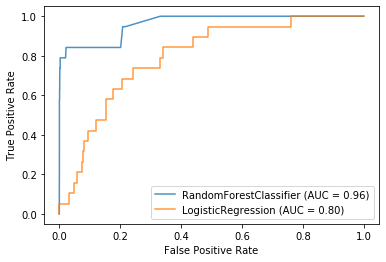

In [40]:
ax = plt.gca()
rf_disp = plot_roc_curve(rf, x_test, y_test,ax=ax, alpha=0.8)
lr_disp = plot_roc_curve(LR_model, x_test, y_test,ax=ax, alpha=0.8)
plt.show()

In [41]:
x_test["RF_pred"] = RF_pred
out = x_test[["id", "RF_pred"]]
out.describe()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,RF_pred
count,10372.000000,10372.000000
mean,321532.373602,-0.990166
std,184568.791620,0.139905
min,114.000000,-1.000000
25%,163171.750000,-1.000000
50%,322433.000000,-1.000000
75%,480835.750000,-1.000000
max,638496.000000,1.000000


In [42]:
out.to_csv("/Users/danielalejandroramos/Desktop/BDBA Masters/Machine Learning with Python/Assignments/results.csv")